In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame([[100, 6, np.nan], 
                  [9, 5, 12], 
                  [np.nan, np.nan, np.nan], 
                  [-3, 4, -200],
                  [2, 0, 7]])

In [4]:
df=df.fillna(0)
df

,0,1,2
0,100.0,6.0,0.0
1,9.0,5.0,12.0
2,0.0,0.0,0.0
3,-3.0,4.0,-200.0
4,2.0,0.0,7.0


In [6]:
from math import sqrt
col1=df[0]
average=col1.mean()
#Tính độ lệch chuẩn
s = 0
for i in col1.values:
    s+=(i-average)**2
s = sqrt(s/col1.count())
z = []
for i in col1.values:
    z.append((i-average)/s)
z
#Dương là lớn hơn giá trị trung bình, âm là nhỏ hơn giá trị trung bình

[1.989924629457873,
 -0.3198093154485867,
 -0.5482445407690058,
 -0.6243896158758121,
 -0.49748115736446824]

In [7]:
from scipy import stats
z= stats.zscore(df)
print(z)

          0         1         2
0  1.989925  1.185854  0.441327
1 -0.319809  0.790569  0.587623
2 -0.548245 -1.185854  0.441327
3 -0.624390  0.395285 -1.996943
4 -0.497481 -1.185854  0.526666


In [9]:
z_s=df.apply(stats.zscore)
z_s

,0,1,2
0,1.989925,1.185854,0.441327
1,-0.319809,0.790569,0.587623
2,-0.548245,-1.185854,0.441327
3,-0.624390,0.395285,-1.996943
4,-0.497481,-1.185854,0.526666


In [19]:
iqr_data = pd.Series([3, 5, 7, 8, 9, 11, 15, 16, 20, 21])
middle = iqr_data.median()
iqr_data1 = pd.Series([3, 5, 7, 8, 9])
q1=iqr_data1.median()
q3=16
iqr=q3-q1
left_limit = q1 -1.5*iqr
left_limit


-6.5

In [20]:
df = pd.DataFrame([[100, 6, 5], 
                  [9, 5, 12], 
                  [6, 1, 0], 
                  [-3, 4, -200],
                  [2, 0, 7]], columns=['A', 'B', 'C'])
df

,A,B,C
0,100,6,5
1,9,5,12
2,6,1,0
3,-3,4,-200
4,2,0,7


In [21]:
#Chuẩn hóa dữ liệu theo zscore
#trả về mảng đa chiều luôn (array)
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(df)

df_s=pd.DataFrame(df_s,columns=['A','B','C'])
print(df_s)

          A         B         C
0  1.989215  1.209416  0.487333
1 -0.355585  0.777482  0.572192
2 -0.432886 -0.950255  0.426720
3 -0.664789  0.345547 -1.997824
4 -0.535954 -1.382189  0.511579


In [8]:
import seaborn as sns
sns.boxplot(x=df['A'])

NameError: name 'df' is not defined

<AxesSubplot:xlabel='A'>

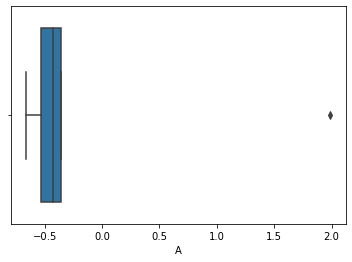

In [23]:
sns.boxplot(x=df_s['A'])

In [24]:
df

,A,B,C
0,100,6,5
1,9,5,12
2,6,1,0
3,-3,4,-200
4,2,0,7


In [27]:
#Chuẩn hóa dữ liệu theo MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
s_scaler = MinMaxScaler()
df_s = s_scaler.fit_transform(df)
df_s=pd.DataFrame(df_s,columns=['A','B','C'])
print(df_s)

          A         B         C
0  1.000000  1.000000  0.966981
1  0.116505  0.833333  1.000000
2  0.087379  0.166667  0.943396
3  0.000000  0.666667  0.000000
4  0.048544  0.000000  0.976415


<AxesSubplot:xlabel='A'>

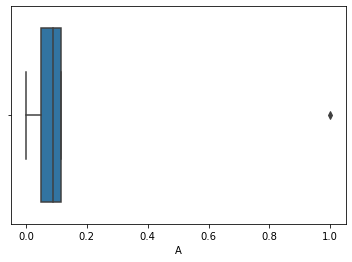

In [28]:
sns.boxplot(x=df_s['A'])

In [29]:
#Chuẩn hóa dữ liệu theo RobustScaler
from sklearn.preprocessing import RobustScaler
s_scaler = RobustScaler()
df_s = s_scaler.fit_transform(df)
df_s=pd.DataFrame(df_s,columns=['A','B','C'])
print(df_s)

           A     B          C
0  13.428571  0.50   0.000000
1   0.428571  0.25   1.000000
2   0.000000 -0.75  -0.714286
3  -1.285714  0.00 -29.285714
4  -0.571429 -1.00   0.285714


<AxesSubplot:xlabel='A'>

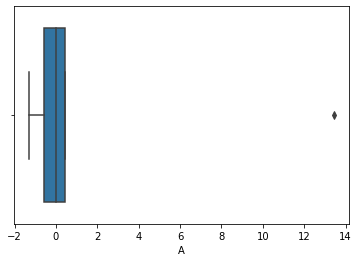

In [30]:
sns.boxplot(x=df_s['A'])

In [18]:
#Độ phân bố dữ liệu nằm trong khoảng nào? Có giá trị ngoại lai hay ko? Nếu muốn chuyển cột Country thành index thì thêm index_col='Country'
#pop=pd.read_csv(r'C:\Users\Admin\resources\population_book0.csv',encoding = 'utf-8', index_col='Country')
pop=pd.read_csv(r'C:\Users\Admin\resources\population_book0.csv',encoding = 'utf-8', index_col='Country')
pop

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
Country,,,,,,
Algeria,44.9,22.0,5.0,19.0,74.0,598.0
Egypt,103.5,21.0,7.0,16.0,44.0,3077.0
Libya,NaN,17.0,6.0,9.0,81.0,NaN
Morocco,36.7,92.0,50.0,15.0,64.0,479.0
Sudan,46.9,34.0,7.0,39.0,36.0,223.0
Tunisia,11.8,16.0,8.0,14.0,156.0,456.0
Western Sahara,0.6,17.0,6.0,26.0,87.0,14400.0
Ghana,33.5,28.0,8.0,32.0,58.0,1332.0
Liberia,5.3,31.0,9.0,58.0,53.0,1061.0


In [19]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Algeria to Cabo Verde
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Population(millions)         16 non-null     float64
 1   Births per 1000 population   16 non-null     float64
 2   Deaths per 1000 populationi  15 non-null     float64
 3   Infant mortality rate        16 non-null     float64
 4   Urban Population (%)         15 non-null     float64
 5   Density of population        16 non-null     float64
dtypes: float64(6)
memory usage: 952.0+ bytes


In [20]:
pop.isna()

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
Country,,,,,,
Algeria,False,False,False,False,False,False
Egypt,False,False,False,False,False,False
Libya,True,False,False,False,False,True
Morocco,False,False,False,False,False,False
Sudan,False,False,False,False,False,False
Tunisia,False,False,False,False,False,False
Western Sahara,False,False,False,False,False,False
Ghana,False,False,False,False,False,False
Liberia,False,False,False,False,False,False


In [21]:
pop_1=pop.dropna(subset=['Population(millions)'])

In [22]:
pop_2=pop_1.fillna(method='bfill')

<AxesSubplot:xlabel='Population(millions)'>

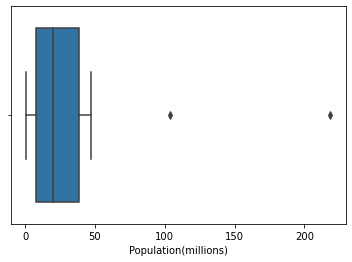

In [23]:
sns.boxplot(x=pop_2['Population(millions)'])
#Độ phân bố nằm trong khoảng 0 đến 50, có 2 giá trị ngoại lai là của Egypt và Nigeria

KeyError: "None of [Float64Index([ 44.9, 103.5,  36.7,  46.9,  11.8,   0.6,  33.5,   5.3,  22.6,\n              218.5,  17.9,   8.8,   2.7,  13.4,  22.7,   0.6],\n             dtype='float64')] are in the [columns]"

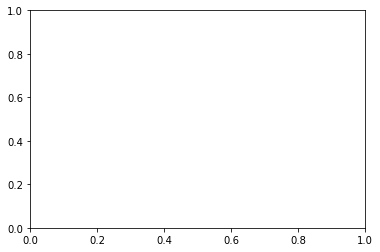

In [32]:
import matplotlib.pyplot as plt
pop_2.plot.scatter(x=pop_2['Population(millions)'],y=pop_2['Density of population'],c='blue')

In [27]:
from scipy import stats
z=stats.zscore(pop_2)
print(z)

                Population(millions)  Births per 1000 population  \
Country                                                            
Algeria                     0.150628                   -0.430830   
Egypt                       1.253980                   -0.485539   
Morocco                    -0.003766                    3.398772   
Sudan                       0.188285                    0.225673   
Tunisia                    -0.472596                   -0.759082   
Western Sahara             -0.683475                   -0.704373   
Ghana                      -0.064017                   -0.102579   
Liberia                    -0.594981                    0.061547   
Mali                       -0.269248                    0.663342   
Nigeria                     3.419260                   -0.977916   
Senegal                    -0.357742                    0.116256   
Togo                       -0.529082                    0.116256   
Gambia                     -0.643935            

In [28]:
noisy=np.where((z>1.2)|(z<-1.2))
noisy

(array([ 1,  2,  2,  4,  5,  7,  9,  9, 11, 14, 15], dtype=int64),
 array([0, 1, 2, 4, 5, 3, 0, 3, 4, 3, 3], dtype=int64))

In [29]:
z=z[((z<1.2)&(z>-1.2)).all(axis=1)]
z

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
Country,,,,,,
Algeria,0.150628,-0.430830,-0.500710,-0.767465,0.405905,-0.268857
Sudan,0.188285,0.225673,-0.309963,0.319211,-0.840510,-0.378901
Ghana,-0.064017,-0.102579,-0.214590,-0.061126,-0.118901,-0.053463
Mali,-0.269248,0.663342,0.166903,1.188553,-0.282903,-0.341046
Senegal,-0.357742,0.116256,-0.500710,-0.006792,-0.414105,-0.429962
Gambia,-0.643935,0.170964,-0.214590,-0.115459,-0.118901,-0.425854
Benin,-0.442470,0.335090,-0.119217,1.134219,-0.414105,-0.304365


In [30]:
Q1=pop_2.quantile(0.25)
Q3=pop_2.quantile(0.75)
IQR =Q3-Q1
print(IQR)

Population(millions)            30.825
Births per 1000 population      16.500
Deaths per 1000 populationi      3.250
Infant mortality rate           30.750
Urban Population (%)            25.000
Density of population          909.250
dtype: float64


In [31]:
pop_3 = pop_2[~((pop_2 <(Q1-1.5*IQR))|(pop_2 >(Q3+1.5*IQR))).any(axis=1)]
pop_3

,Population(millions),Births per 1000 population,Deaths per 1000 populationi,Infant mortality rate,Urban Population (%),Density of population
Country,,,,,,
Algeria,44.9,22.0,5.0,19.0,74.0,598.0
Sudan,46.9,34.0,7.0,39.0,36.0,223.0
Ghana,33.5,28.0,8.0,32.0,58.0,1332.0
Liberia,5.3,31.0,9.0,58.0,53.0,1061.0
Mali,22.6,42.0,12.0,55.0,53.0,352.0
Senegal,17.9,32.0,5.0,33.0,49.0,49.0
Gambia,2.7,33.0,8.0,31.0,58.0,63.0
Benin,13.4,36.0,9.0,54.0,49.0,477.0
Burkina Faso,22.7,15.0,5.0,11.0,74.0,378.0
